1. Loading Data

In [1]:
import pandas as pd

df = pd.read_csv('transactional-sample.csv')
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      3199 non-null   int64         
 1   merchant_id         3199 non-null   int64         
 2   user_id             3199 non-null   int64         
 3   card_number         3199 non-null   object        
 4   transaction_date    3199 non-null   datetime64[ns]
 5   transaction_amount  3199 non-null   float64       
 6   device_id           2369 non-null   float64       
 7   has_cbk             3199 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 178.2+ KB
None


In [7]:
print(df.head())

   transaction_id  merchant_id  user_id       card_number  \
0        21320398        29744    97051  434505******9116   
1        21320399        92895     2708  444456******4210   
2        21320400        47759    14777  425850******7024   
3        21320401        68657    69758  464296******3991   
4        21320402        54075    64367  650487******6116   

            transaction_date  transaction_amount  device_id  has_cbk  
0 2019-12-01 23:16:32.812632              374.56   285475.0    False  
1 2019-12-01 22:45:37.873639              734.87   497105.0     True  
2 2019-12-01 22:22:43.021495              760.36        NaN    False  
3 2019-12-01 21:59:19.797129             2556.13        NaN     True  
4 2019-12-01 21:30:53.347051               55.36   860232.0    False  


2. Exploring Data

a. Fraud vs. Non-Fraud Comparison

In [10]:
fraud_df = df[df['has_cbk'] == True]
non_fraud_df = df[df['has_cbk'] == False]

len(fraud_df)

391

We have 391 fraudulent transaction (12.22%).

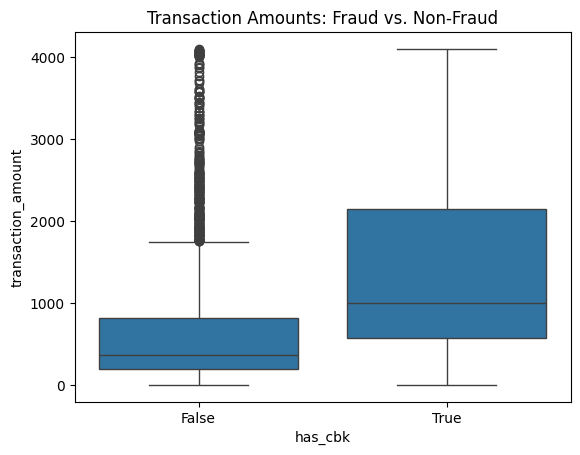

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='has_cbk', y='transaction_amount', data=df)
plt.title('Transaction Amounts: Fraud vs. Non-Fraud')
plt.show()

Example Interpretation:
If the Fraudulent Box (True) is Higher:

This might indicate that fraudulent transactions tend to involve higher amounts.
If the Non-Fraudulent Box (False) is More Compact:

It could mean that legitimate transactions usually have more consistent amounts.
Outliers in Fraudulent Transactions:

Numerous outliers in the fraudulent transactions could suggest that fraud is more likely to occur with transactions that are abnormal in amount compared to the general trend.

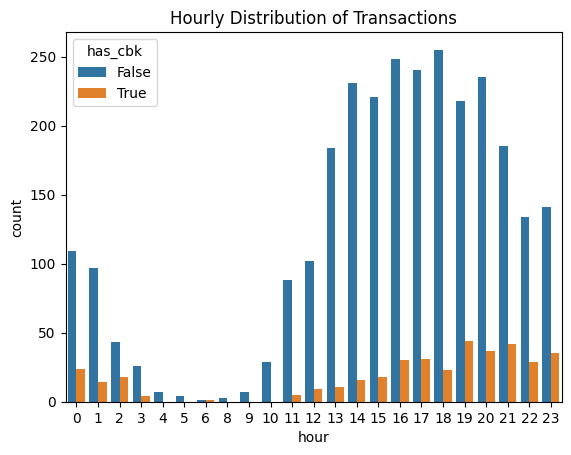

In [12]:
df['hour'] = df['transaction_date'].dt.hour
df['day_of_week'] = df['transaction_date'].dt.day_name()

sns.countplot(data=df, x='hour', hue='has_cbk')
plt.title('Hourly Distribution of Transactions')
plt.show()

What to Look For:
Peak Hours for Transactions:

Identify which hours have the highest overall transaction volumes. These are typically shown by the tallest bars.
Comparison Between Fraudulent and Non-Fraudulent Transactions:

Different Bar Segments: If the bars are color-coded or stacked, you can see the relative number of fraudulent versus non-fraudulent transactions at each hour. For example, one color might represent fraudulent transactions, and another represents non-fraudulent ones.
Hour-Specific Patterns: Look for hours where fraudulent transactions are more prevalent compared to other hours. If certain hours have a higher proportion of fraudulent transactions, these times might be more vulnerable to fraud.
Hourly Trends:

Patterns of Fraudulent Transactions: If fraudulent transactions cluster around certain hours (e.g., late at night or early in the morning), this could indicate that fraudsters prefer specific times to conduct their activities, possibly when they assume oversight is lower.
Comparison of Peak Times: Compare the peak times for fraudulent and non-fraudulent transactions. If these peaks occur at different hours, it might suggest that fraudulent transactions tend to happen outside of regular business hours.

Example Interpretation:
If Fraudulent Transactions Spike at Specific Hours:

For example, if fraudulent transactions spike between 2 AM and 4 AM, this might suggest that fraudsters are exploiting low-monitoring periods.
If Non-Fraudulent Transactions are Consistent Throughout the Day:

Non-fraudulent transactions may show a more consistent pattern throughout regular business hours (e.g., 8 AM to 6 PM), reflecting normal consumer behavior.
Discrepancies in Transaction Timing:

Significant differences in the timing of fraudulent vs. non-fraudulent transactions can provide insights into when additional monitoring or security measures should be implemented.

Conclusion
This graph helps to visually understand whether there are specific hours during the day when fraud is more likely to occur compared to legitimate transactions. Identifying these patterns can be crucial for designing more effective fraud detection and prevention strategies, such as heightened monitoring or alerts during high-risk periods.

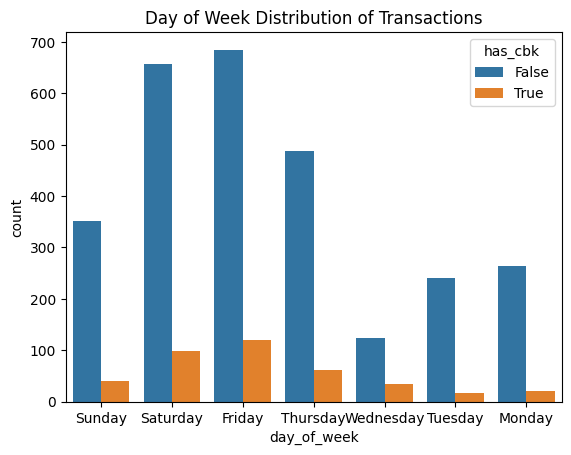

In [15]:
sns.countplot(data=df, x='day_of_week', hue='has_cbk')
plt.title('Day of Week Distribution of Transactions')
plt.show()

What to Look For:

Transaction Volume by Day:
Identify which days have the highest and lowest overall transaction volumes by looking at the height of the bars.
Comparison Between Fraudulent and Non-Fraudulent Transactions:

Different Bar Segments: If the bars are color-coded or stacked, they show the relative number of fraudulent versus non-fraudulent transactions on each day. For example, one color might indicate fraudulent transactions, and another indicates non-fraudulent ones.
Day-Specific Patterns: Look for days where fraudulent transactions are more prevalent compared to others. If certain days show a higher proportion of fraudulent transactions, these could be high-risk periods.

Weekly Trends:
Patterns of Fraudulent Transactions: Observe if fraudulent transactions tend to cluster around specific days, such as weekends or weekdays. This could indicate patterns or strategies used by fraudsters.
Comparison of Peak Days: Compare the peak days for fraudulent transactions with those for non-fraudulent ones. If these peaks occur on different days, it could suggest that fraudulent transactions are more common on certain days.

Example Interpretation:
If Fraudulent Transactions Spike on Weekends:

If the bars for Saturday and Sunday show a higher proportion of fraudulent transactions, it could suggest that fraudsters take advantage of weekends, possibly due to reduced monitoring or staffing.
If Non-Fraudulent Transactions are Higher on Weekdays:

Legitimate transactions might be more common on weekdays, aligning with typical business and consumer activity patterns.
Discrepancies Between Fraudulent and Non-Fraudulent Transactions:

Significant differences between the days when fraudulent vs. non-fraudulent transactions are most common might indicate that fraudsters target specific days to increase their chances of success.

Conclusion
This graph helps to visually identify whether certain days of the week are more prone to fraud compared to others. Understanding these patterns can be crucial for optimizing fraud detection efforts, such as allocating more resources or increasing monitoring on high-risk days. It also provides insights into general transaction behavior, which can help in differentiating between normal and suspicious activity.

c. Merchant Analysis

In [34]:
merchant_fraud_rate = df.groupby('merchant_id')['has_cbk'].mean().sort_values(ascending=False).to_frame()

print(merchant_fraud_rate)

             has_cbk
merchant_id         
96692            1.0
11911            1.0
5763             1.0
1017             1.0
62988            1.0
...              ...
97629            0.0
97631            0.0
97685            0.0
97774            0.0
921              0.0

[1756 rows x 1 columns]


We have 3.200 transactions with 1.756 unique merchants.

In [35]:
print(merchant_fraud_rate[merchant_fraud_rate['has_cbk'] == 1.0])

             has_cbk
merchant_id         
96692            1.0
11911            1.0
5763             1.0
1017             1.0
62988            1.0
...              ...
54603            1.0
56977            1.0
59875            1.0
62194            1.0
62613            1.0

[66 rows x 1 columns]


We have 66 merchants in which 100% of transactions are fraudulent (3.76%).

In [37]:
print(merchant_fraud_rate[merchant_fraud_rate['has_cbk'] != 0])

              has_cbk
merchant_id          
96692        1.000000
11911        1.000000
5763         1.000000
1017         1.000000
62988        1.000000
...               ...
63050        0.250000
68953        0.166667
90035        0.142857
29744        0.090909
76725        0.083333

[118 rows x 1 columns]


We have 118 merchants with at least 01 fraudulent transaction (6.72%). Which means that 1.638 merchants have no fraudulent transaction at all.

d. Device Analysis

In [38]:
device_fraud_rate = df.groupby('device_id')['has_cbk'].mean().sort_values(ascending=False).to_frame()

print(device_fraud_rate)

           has_cbk
device_id         
355583.0       1.0
548247.0       1.0
287404.0       1.0
306719.0       1.0
486.0          1.0
...            ...
981937.0       0.0
981958.0       0.0
983219.0       0.0
983300.0       0.0
983459.0       0.0

[1996 rows x 1 columns]


We have 3.200 transactions with 1.996 unique identified devices.

In [39]:
print(device_fraud_rate[device_fraud_rate['has_cbk'] == 1.0])

           has_cbk
device_id         
355583.0       1.0
548247.0       1.0
287404.0       1.0
306719.0       1.0
486.0          1.0
...            ...
881571.0       1.0
884678.0       1.0
890266.0       1.0
892328.0       1.0
917759.0       1.0

[102 rows x 1 columns]


We have 102 identified devices in which 100% of transactions are fraudulent (5.11%).

In [40]:
print(device_fraud_rate[device_fraud_rate['has_cbk'] != 0])

            has_cbk
device_id          
355583.0   1.000000
548247.0   1.000000
287404.0   1.000000
306719.0   1.000000
486.0      1.000000
...             ...
274282.0   0.375000
94234.0    0.333333
645413.0   0.333333
708348.0   0.250000
866529.0   0.250000

[129 rows x 1 columns]


We have 129 devices with at least 01 fraudulent transaction (6.46%). Which means that 1.867 devices have no fraudulent transaction at all.

e. Missing Device ID Analysis

In [44]:
missing_deviceid = df[df['device_id'].isna()]

print(missing_deviceid.info())

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 2 to 3198
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      830 non-null    int64         
 1   merchant_id         830 non-null    int64         
 2   user_id             830 non-null    int64         
 3   card_number         830 non-null    object        
 4   transaction_date    830 non-null    datetime64[ns]
 5   transaction_amount  830 non-null    float64       
 6   device_id           0 non-null      float64       
 7   has_cbk             830 non-null    bool          
 8   hour                830 non-null    int32         
 9   day_of_week         830 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 62.4+ KB
None


There are 830 transactions without a device id (25.94%).

In [45]:
missing_deviceid_fraud = missing_deviceid[missing_deviceid['has_cbk'] == True]

missing_deviceid_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 3 to 3185
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      67 non-null     int64         
 1   merchant_id         67 non-null     int64         
 2   user_id             67 non-null     int64         
 3   card_number         67 non-null     object        
 4   transaction_date    67 non-null     datetime64[ns]
 5   transaction_amount  67 non-null     float64       
 6   device_id           0 non-null      float64       
 7   has_cbk             67 non-null     bool          
 8   hour                67 non-null     int32         
 9   day_of_week         67 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 5.0+ KB


There are 67 fraudulent transactions from unidenfitied devices (8.07%). This means that we have 763 valid transactions from unidentified devices.

We have a total of 391 fraudulent transactions of 3.200 transactions. So, we have 324 fraudulent transactions from identified devices.

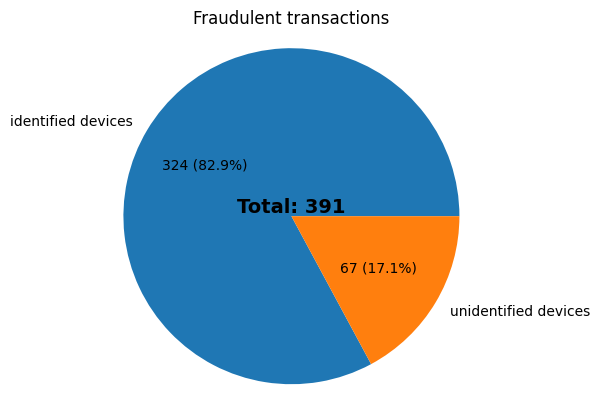

In [57]:
labels = ['identified devices', 'unidentified devices']
sizes = [324, 67]

# Show value and percentage in the chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val} ({pct:.1f}%)'
    return my_format

# Show the total of values in the chart
total = sum(sizes)
plt.text(0, 0, f'Total: {total}', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.pie(sizes, labels=labels, autopct=autopct_format(sizes))
plt.axis('equal')
plt.title('Fraudulent transactions')
plt.show()

f. Card analysis

In [58]:
card_fraud_rate = df.groupby('card_number')['has_cbk'].mean().sort_values(ascending=False).to_frame()

print(card_fraud_rate)

                  has_cbk
card_number              
422061******5068      1.0
498406******4794      1.0
412177******1138      1.0
406655******7948      1.0
406655******8217      1.0
...                   ...
230744******2330      0.0
230744******2602      0.0
230744******3422      0.0
230744******3560      0.0
650914******7919      0.0

[2925 rows x 1 columns]


We have 2.925 unique cards used in 3.200 transactions.

In [60]:
print(card_fraud_rate[card_fraud_rate['has_cbk'] == 1.0])

                  has_cbk
card_number              
422061******5068      1.0
498406******4794      1.0
412177******1138      1.0
406655******7948      1.0
406655******8217      1.0
...                   ...
606282******9552      1.0
606282******9701      1.0
606282******9980      1.0
650486******2500      1.0
650486******4290      1.0

[267 rows x 1 columns]


We have 267 cards in which 100% of transactions are fraudulent (9.12%).

In [61]:
print(card_fraud_rate[card_fraud_rate['has_cbk'] != 0])

                  has_cbk
card_number              
422061******5068     1.00
498406******4794     1.00
412177******1138     1.00
406655******7948     1.00
406655******8217     1.00
...                   ...
455183******5202     0.50
544731******8590     0.50
536380******6214     0.50
546056******2924     0.50
496045******1160     0.25

[274 rows x 1 columns]


We have 274 cards with at least 01 fraudulent transaction (9.37%). Which means that 2.651 cards have no fraudulent transaction at all.

g. User analysis

In [59]:
user_fraud_rate = df.groupby('user_id')['has_cbk'].mean().sort_values(ascending=False).to_frame()

print(user_fraud_rate)

         has_cbk
user_id         
44531        1.0
39334        1.0
45031        1.0
11065        1.0
86411        1.0
...          ...
1620         0.0
1668         0.0
1695         0.0
1703         0.0
99974        0.0

[2704 rows x 1 columns]


We have 2.704 unique users in 3.200 transactions.

In [62]:
print(user_fraud_rate[user_fraud_rate['has_cbk'] == 1.0])

         has_cbk
user_id         
44531        1.0
39334        1.0
45031        1.0
11065        1.0
86411        1.0
...          ...
83826        1.0
84071        1.0
85612        1.0
85897        1.0
86219        1.0

[120 rows x 1 columns]


We have 120 users in which 100% of transactions are fraudulent (4.44%).

In [63]:
print(user_fraud_rate[user_fraud_rate['has_cbk'] != 0])

          has_cbk
user_id          
44531    1.000000
39334    1.000000
45031    1.000000
11065    1.000000
86411    1.000000
...           ...
9853     0.444444
11452    0.375000
57594    0.333333
7281     0.250000
10241    0.200000

[153 rows x 1 columns]


We have 153 users with at least 01 fraudulent transaction (5.66%). Which means that 2.551 cards have no fraudulent transaction at all.

In [64]:
user_cards = df.groupby('user_id')['card_number'].count().sort_values(ascending=False).to_frame()

print(user_cards)

         card_number
user_id             
11750             31
91637             22
79054             17
96025             14
78262             13
...              ...
1620               1
4058               1
1695               1
4277               1
99974              1

[2704 rows x 1 columns]


We have some users with a oddly high number of cards, which may indicate fraud.

In [65]:
print(user_cards[user_cards['card_number'] > 1])

         card_number
user_id             
11750             31
91637             22
79054             17
96025             14
78262             13
...              ...
16862              2
99850              2
1516               2
1668               2
1703               2

[235 rows x 1 columns]


We have 235 users with 2 or more cards.

In [71]:
user_cards[user_cards['card_number'] > 4].info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 11750 to 99396
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   card_number  29 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


We have 29 users with 5 or more cards, increasing chances that their transactions are fraudulent.